#○ train_test_split / Scaler 분류모델 실습
#○ accuracy, confusion metrix해석

○ 2유형 문제풀이 순서
1.   문제정의          -> 회귀/분류모델 구분
2.   라이브러리 및 데이터 불러오기
3.   탐색적 데이터 분석(EDA)
4.   데이터전처리      -> Scaler
5.   검증 데이터 분할  -> train_test_split
6.   머신러닝 학습 및 평가 > accuracy & confusion metrix
7.   예측 및 결과 파일 생성
8.   제출 및 제출파일 확인

# 모델별 결과값

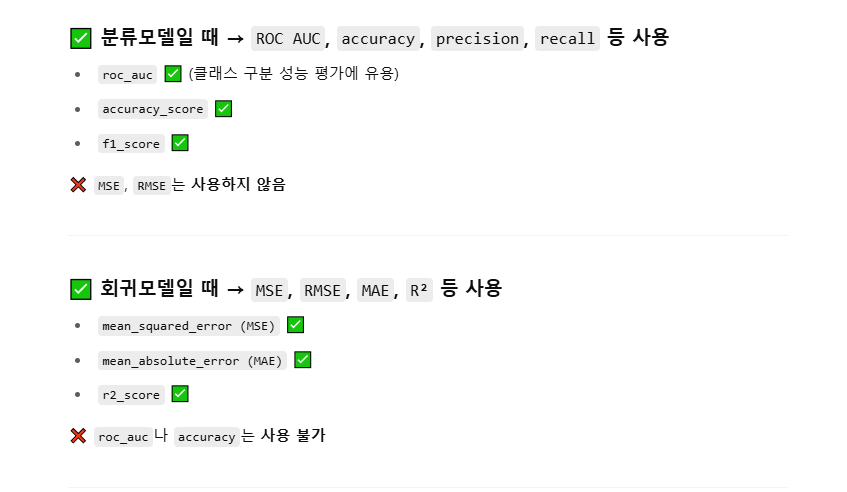

##1. train_test_spli의  definition

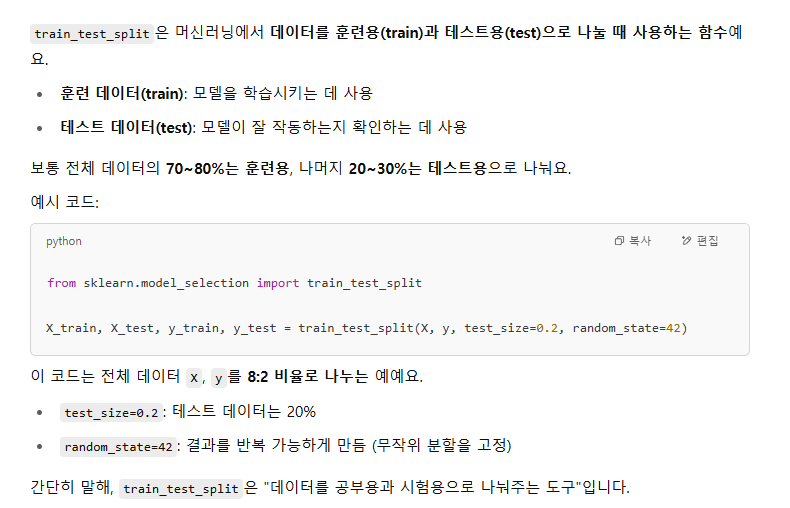

In [ ]:
#3개 데이터 일경우
from sklearn.model_selection import train_test_split
X_tr, X_val, y_tr, y_val = train_test_split(X_train,
                                            y_train['Reached.on.Time_Y.N'],
                                            test_size= 0.2,
                                            random_state= 2022)

# X_train :	입력 데이터 (특징들, 독립변수)
# y_train['Reached.on.Time_Y.N'] :	정답(label), 즉 예측하고 싶은 값 (종속변수)
# test_size=0.2 :	전체 데이터 중 **20%를 검증용(Validation)**으로 사용
# random_state=2022 :	데이터가 무작위로 섞일 때의 시드값 → 같은 결과 재현 가능하게 함
#즉  X_train과 **y_train['Reached.on.Time_Y.N']**을 8:2로 나눠서,
# → 학습용(X_tr, y_tr)과 검증용(X_val, y_val) 데이터로 만드는 코드

#만약 train과 test만 주어졌다면  -> y_train 쪽의 값은 train['예측정답']

#2개데이터 주어졌을경우
from sklearn.model_selection import train_test_split

X_tr,X_val, y_tr, y_val = train_test_split(train.drop('TravelInsurance', axis=1),
                                           train['TravelInsurance'],
                                           test_size = 0.2,
                                           random_state=2025)

X_tr.shape, X_val.shape, y_tr.shape, y_val.shape

2.Scaler


1.   StandardScaler
2.   MinMaxScaler
3.   RobustScaler



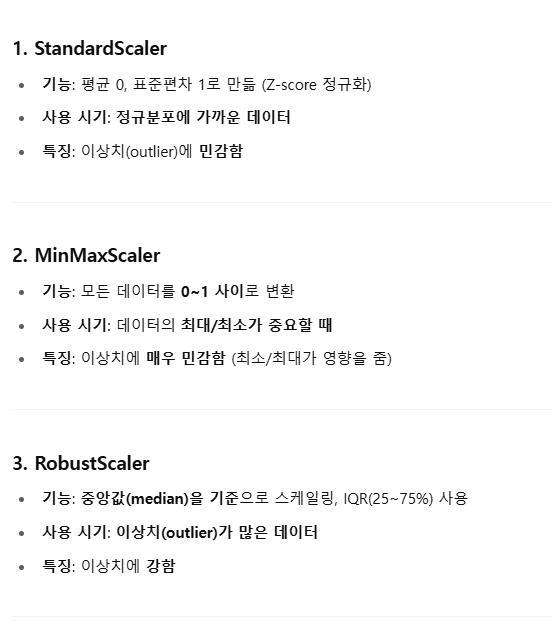

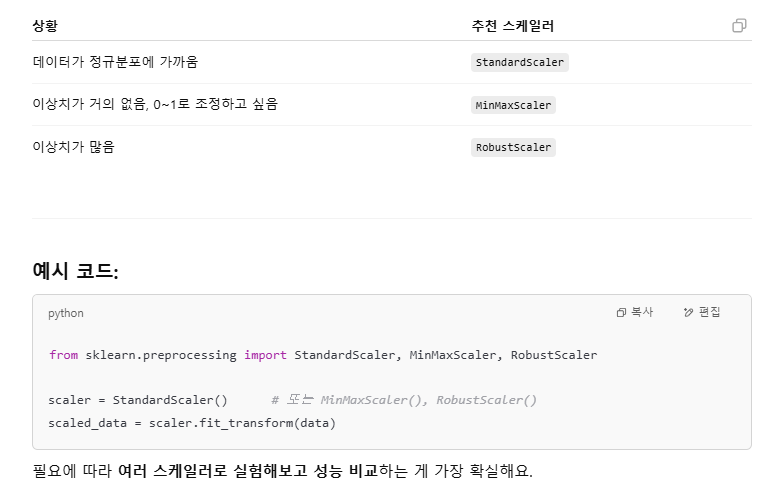

3. Scaler와 Encoding의 차이

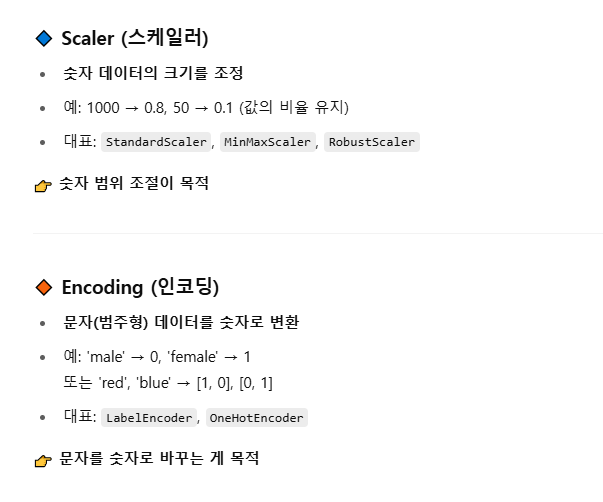

In [ ]:
train_col_num = train.select_dtypes(exclude = 'object')
test_col_num = test.select_dtypes(exclude = 'object')
train_col_object = train.select_dtypes(include ='object')
test_col_object = test.select_dtypes(include='object')

#스케일링 ->col_num 활용
#인코딩 -> col_object활용

#스케일링 코드
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler
scaler = RobustScaler()
train[train_col_num] = scaler.fit_transform(train_col_num)
test[test_col_num] = scaler.transform(test_col_num)



#인코딩 코드 -> 원핫 인코딩 -> 원핫인코딩은 전체 컬럼을 새로 만들기를 하기 떄문에 train[train_col_object] 이렇게 덮어쓰기하면 오류나 잘못된 결과 나올수 있음
#즉 인코딩 결과는 별도로 다시 생성해서 다시 train과 합해야함
#원-핫인코딩
train_encoding = pd.get_dummies(train_col_object).astype(int)
test_encoding = pd.get_dummies(test_col_object).astype(int)

train = pd.concat([train_col_num, train_encoding],axis=1)
test = pd.concat([test_col_num, test_encoding],axis=1)


#라벨 인코딩  ->랜덤포레스트 사용시 좋음 > 순위를 원래 반영하는 인코딩인데, 트리모델은 이를 고려하지 않기 때문에 사용할때 좋음 즉 순서정보가 무의미함.
#             -> 원핫인코딩은 차원이 너무 커질수 있음 -> 컬럼수가 증가하기 때문, 하지만 라벨인코딩은 컬럼 1개만 사용 (1분 內 코드가 실행되어야하는 시험에선는 랜포모델에 하이퍼파라미터 등도 사용하므로, 메모리/속도 좋은 라벨사용)
#             -> 즉 빠르고 간편, 성능차이 크지 않음
from sklearn.preprocessing import LabelEncoder
cols = train.select_dtypes(exclude='object').columns
for col in cols:
    le = LabelEncoder()
    train[col] = le.fit_transform(train[col])
    test[col] = le.transform(test[col])


#





#컬럼맞추기
# test_encoding = test_encoding.reindex(columns= train.encoding.columns, fill_values=0)


In [ ]:
#스캘링한개로 할경우
train_col_num = 'AnnualIncome'
test_col_num = 'AnnualIncome'

from sklearn.preprocessing import MinMaxScaler, StandardScaler, RobustScaler
scaler = RobustScaler()
train[[train_col_num]] = scaler.fit_transform(train[[train_col_num]])
test[[test_col_num]] = scaler.transform(test[[test_col_num]])


#스캘링 두개로 할 경우
from sklearn.preprocessing import RobustScaler

# 스케일링할 컬럼 리스트
train_col_num  = ['AnnualIncome', 'Familly_Budget']
test_col_num  = ['AnnualIncome', 'Familly_Budget']

scaler = RobustScaler()

# 2개 컬럼을 한 번에 스케일링
train[train_col_num ] = scaler.fit_transform(train[train_col_num ])
test[train_col_num ] = scaler.transform(test[test_col_num ])

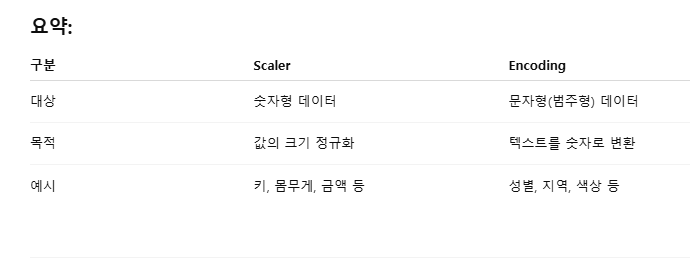

4. 하이퍼파라미터 : 성능을 높이기 위해 사용자가 학습전에 조정하는 변수

In [ ]:
#랜포 하이퍼파라미터 예시
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(random_state = 2022, max_depth= 5, n_estimators = 100)
rf.fit(X_tr, y_tr)
pred_proba = rf.predict_proba(X_val)
print(roc_auc_score(y_val, pred_proba[:,1]))

In [ ]:
#xgboost 하이퍼파라미터 예시
from xgboost import XGBClassifier
xgb = XGBClassifier(random_state=2022, max_depth=1, n_estimators= 100, learning_rate =0.1, subsample=1, colsample_bytree=0.5, gamma=1)
xgb.fit(X_tr, y_tr)
pred_proba = xgb.predict_proba(X_val)
print(roc_auc_score(y_val, pred_proba[:,1]))

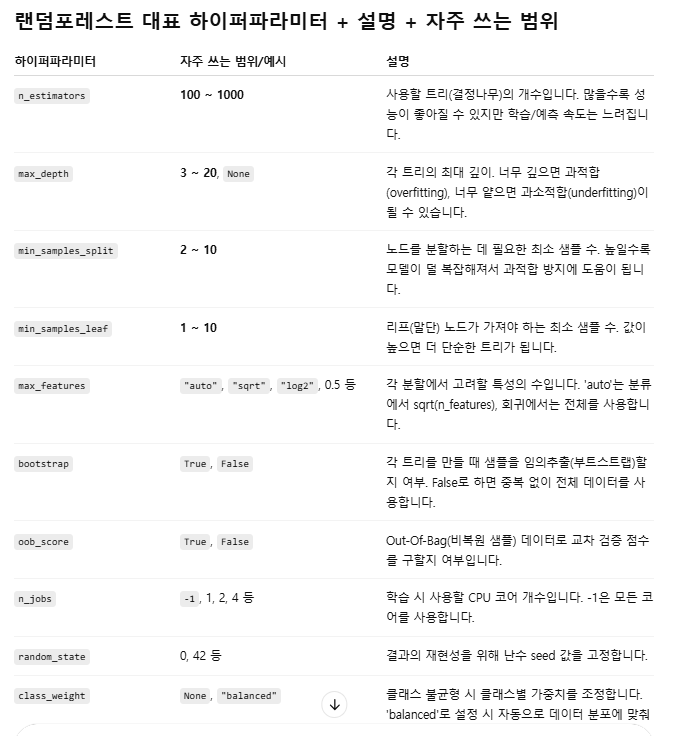

In [ ]:
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier(
    n_estimators=300,         # 트리 개수 (ex: 100, 300, 500)
    max_depth=10,             # 최대 깊이 (ex: 5, 10, 20, None)
    min_samples_split=4,      # 노드 분할 최소 샘플 수 (ex: 2~10)
    min_samples_leaf=2,       # 리프노드 최소 샘플 수 (ex: 1~10)
    max_features='sqrt',      # 분할시 사용할 피처수 ('auto', 'sqrt', 'log2', float)
    bootstrap=True,           # 부트스트랩 샘플 사용 여부
    oob_score=True,           # OOB 점수 사용
    n_jobs=-1,                # 모든 CPU 사용
    random_state=42,          # 랜덤시드 (재현성)
    class_weight='balanced'   # 클래스 불균형 처리
)


4.

5.Confusion marix 예측값


1.   분류모델 -> 각 클래스일 확률
*   predict()사용 -> 클래스일 확률 (0,1)
*   predict_proba()사용 -> 클래스별 확률
*   roc_auc할때만 거의 predict_proba고 나머지는 거의 predict로 보면됨

2.   회귀모델 ->숫자 예측 결과


*   predict()만 사용
*   predict_proba()사용X





In [ ]:
6.데이터가 2개 주어질 경우 -> train, test
  데이터가 3개 주어질 경우 -> X_train, y_train, X_test -> X_train과 y_train(정답지포함)을 합쳐서 학습 후 X_test에는 정답지가 빠져있으므로 정답지를 예측하라고 해야함

X_train = pd.concat([X_train, y_train['Reached.on.Time_Y.N']], axis= 1)  ->index기준
X_train = df.merge(y_train, on = ['ID'] , how ='left')  -> ID를 기준
df.head()

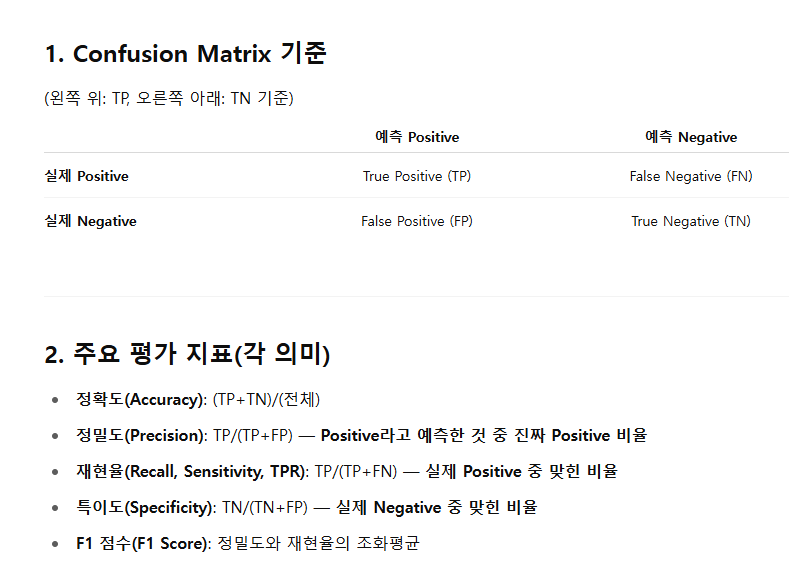

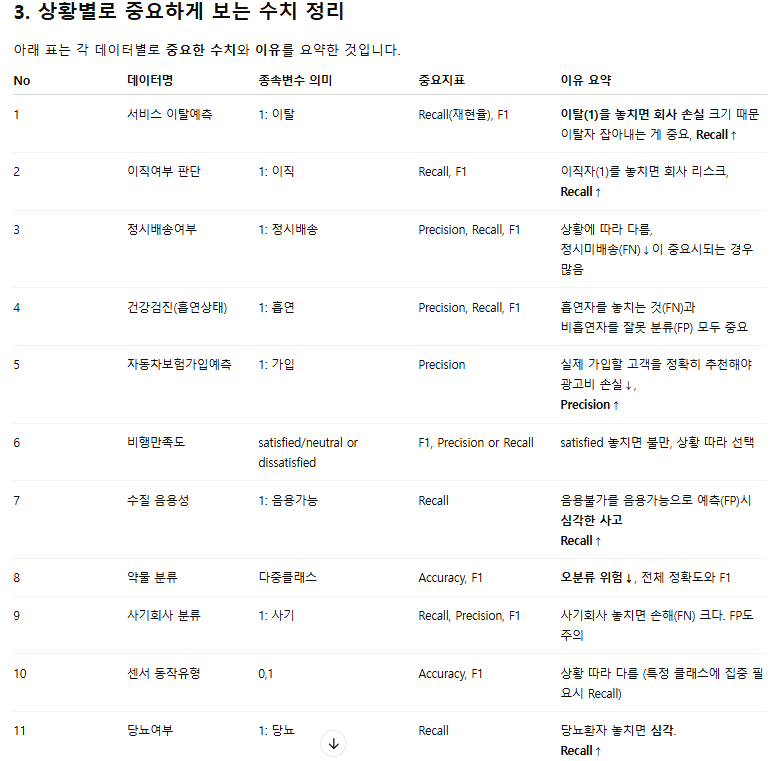

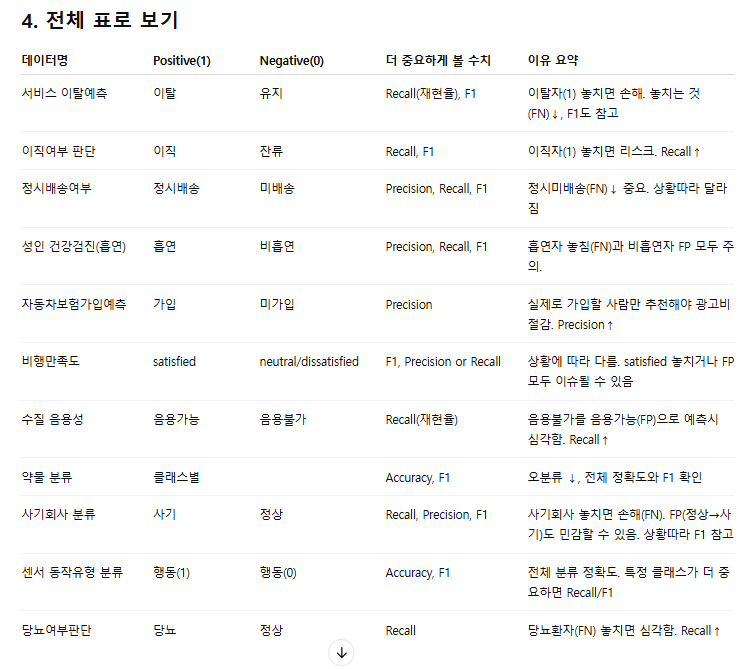

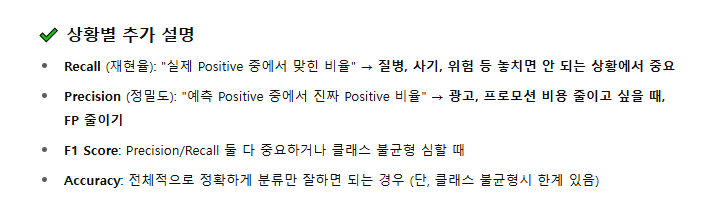